# Training Grover model to distinguish human written between machine generated email content

### I. Preparation
-Installing required packages

-Get authorization from Google

-Connect to Google Cloud Storage Bucket

-Provide credentials to TPU and conenct to my TPU servers

In [2]:
from google.colab import auth
auth.authenticate_user()

In [ ]:
! pip install -r requirements-tpu.txt

In [4]:
import tensorflow as tf

In [5]:
print(tf.__version__)

1.14.0


In [6]:
# setup the bucket to colab (put this in another cell)
import json
import os
import pprint
import re
import time
use_tpu = True #@param {type:"boolean"}
bucket = 'grover-task-jessica' #@param {type:"string"}
assert bucket, 'Must specify an existing GCS bucket name'
print('Using bucket: {}'.format(bucket))
if use_tpu:
    assert 'COLAB_TPU_ADDR' in os.environ, 'Missing TPU; did you request a TPU in Notebook Settings?'
DATA_DIR = 'gs://{}/{}'.format(bucket, time.strftime('tpuestimator-lstm/%Y-%m-%d-%H-%M-%S'))
print('Using data dir: {}'.format(DATA_DIR))
from google.colab import auth
auth.authenticate_user()
if 'COLAB_TPU_ADDR' in os.environ:
  TF_MASTER = 'grpc://{}'.format(os.environ['COLAB_TPU_ADDR'])
  print(TF_MASTER)
#Upload credentials to TPU.
  with tf.Session(TF_MASTER) as sess:    
    with open('/content/adc.json', 'r') as f:
      auth_info = json.load(f)
    tf.contrib.cloud.configure_gcs(sess, credentials=auth_info)
  # Now credentials are set for all future sessions on this TPU.
else:
  TF_MASTER=''
with tf.Session(TF_MASTER) as session:
  pprint.pprint(session.list_devices())

Using bucket: grover-task-jessica
Using data dir: gs://grover-task-jessica/tpuestimator-lstm/2021-04-08-22-12-41
grpc://10.43.227.2:8470
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

[_DeviceAttributes(/job:tpu_worker/replica:0/task:0/device:CPU:0, CPU, -1, 16800269880633301349),
 _DeviceAttributes(/job:tpu_worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 8589934592, 8896629314313455401),
 _DeviceAttributes(/job:tpu_worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 17179869184, 7414725650792643813),
 _DeviceAttributes(/job:tpu_worker/replica:0/task:0/device:TPU:0, TPU, 17179869184, 7063079093583556926),
 _DeviceAttributes(/job:tpu_worker/replica:0/task:0/device:TPU

In [7]:
# use TPU to do the job
import os
try:
  device_name = os.environ['COLAB_TPU_ADDR']
  TPU_ADDRESS = 'grpc://' + device_name
  print('Found TPU at: {}'.format(TPU_ADDRESS))
except KeyError:
  print('TPU not found')

Found TPU at: grpc://10.43.227.2:8470


My TPU ADDRESS: grpc://10.43.227.2:8470

## II. Run the model
- Clone the Grover model from Github
- Set path
- Train and Run!!!!!!

In [11]:
#clone github content
!pwd
!git clone https://github.com/JessicaJiang98/grover.git

/content
fatal: destination path 'grover' already exists and is not an empty directory.


In [8]:
!pwd

/content


### - Train the GROVER model with input_emails jsonl file (4000 human emails, 2000 machine emails)

In [9]:
!python grover/discrimination/run_discrimination.py --input_data=grover/input_emails.jsonl --output_dir=gs://grover-task-jessica-jiang/final_outputs --config_file=grover/lm/configs/base.json --do_train=True --use_tpu=True --tpu_name=grpc://10.43.227.2:8470




W0408 22:33:37.226034 140507597113216 deprecation_wrapper.py:119] From grover/discrimination/run_discrimination.py:142: The name tf.logging.set_verbosity is deprecated. Please use tf.compat.v1.logging.set_verbosity instead.


W0408 22:33:37.226298 140507597113216 deprecation_wrapper.py:119] From grover/discrimination/run_discrimination.py:142: The name tf.logging.INFO is deprecated. Please use tf.compat.v1.logging.INFO instead.


W0408 22:33:37.226431 140507597113216 deprecation_wrapper.py:119] From grover/discrimination/run_discrimination.py:145: The name tf.gfile.Exists is deprecated. Please use tf.io.gfile.exists instead.


W0408 22:33:38.464212 140507597113216 deprecation_wrapper.py:119] From grover/discrimination/run_discrimination.py:175: The name tf.gfile.MakeDirs is deprecated. Please use tf.io.gfile.makedirs instead.


W0408 22:33:39.270550 140507597113216 deprecation_wrapper.py:119] From /content/grover/lm/modeling.py:87: The name tf.gfile.GFile is deprecated. Please use t

### - After training, make the discrimination

In [10]:
!python grover/discrimination/run_discrimination.py --input_data=grover/test_input.jsonl --output_dir=gs://grover-task-jessica-jiang/final_outputs --config_file=grover/lm/configs/base.json --do_train=False --use_tpu=True --predict_test=True --tpu_name=grpc://10.43.227.2:8470




W0408 22:41:44.327543 140404947404672 deprecation_wrapper.py:119] From grover/discrimination/run_discrimination.py:142: The name tf.logging.set_verbosity is deprecated. Please use tf.compat.v1.logging.set_verbosity instead.


W0408 22:41:44.327792 140404947404672 deprecation_wrapper.py:119] From grover/discrimination/run_discrimination.py:142: The name tf.logging.INFO is deprecated. Please use tf.compat.v1.logging.INFO instead.


W0408 22:41:44.327988 140404947404672 deprecation_wrapper.py:119] From grover/discrimination/run_discrimination.py:145: The name tf.gfile.Exists is deprecated. Please use tf.io.gfile.exists instead.

The output directory gs://grover-task-jessica-jiang/final_outputs exists!

W0408 22:41:45.981883 140404947404672 deprecation_wrapper.py:119] From grover/discrimination/run_discrimination.py:160: The name tf.gfile.Open is deprecated. Please use tf.io.gfile.GFile instead.


W0408 22:41:46.204877 140404947404672 deprecation_wrapper.py:119] From /content/grover/lm/

### Displaying my Google Cloud Storage Bucket which contains the output of the Grover training (checkpoints, records, and test-probs...etc)

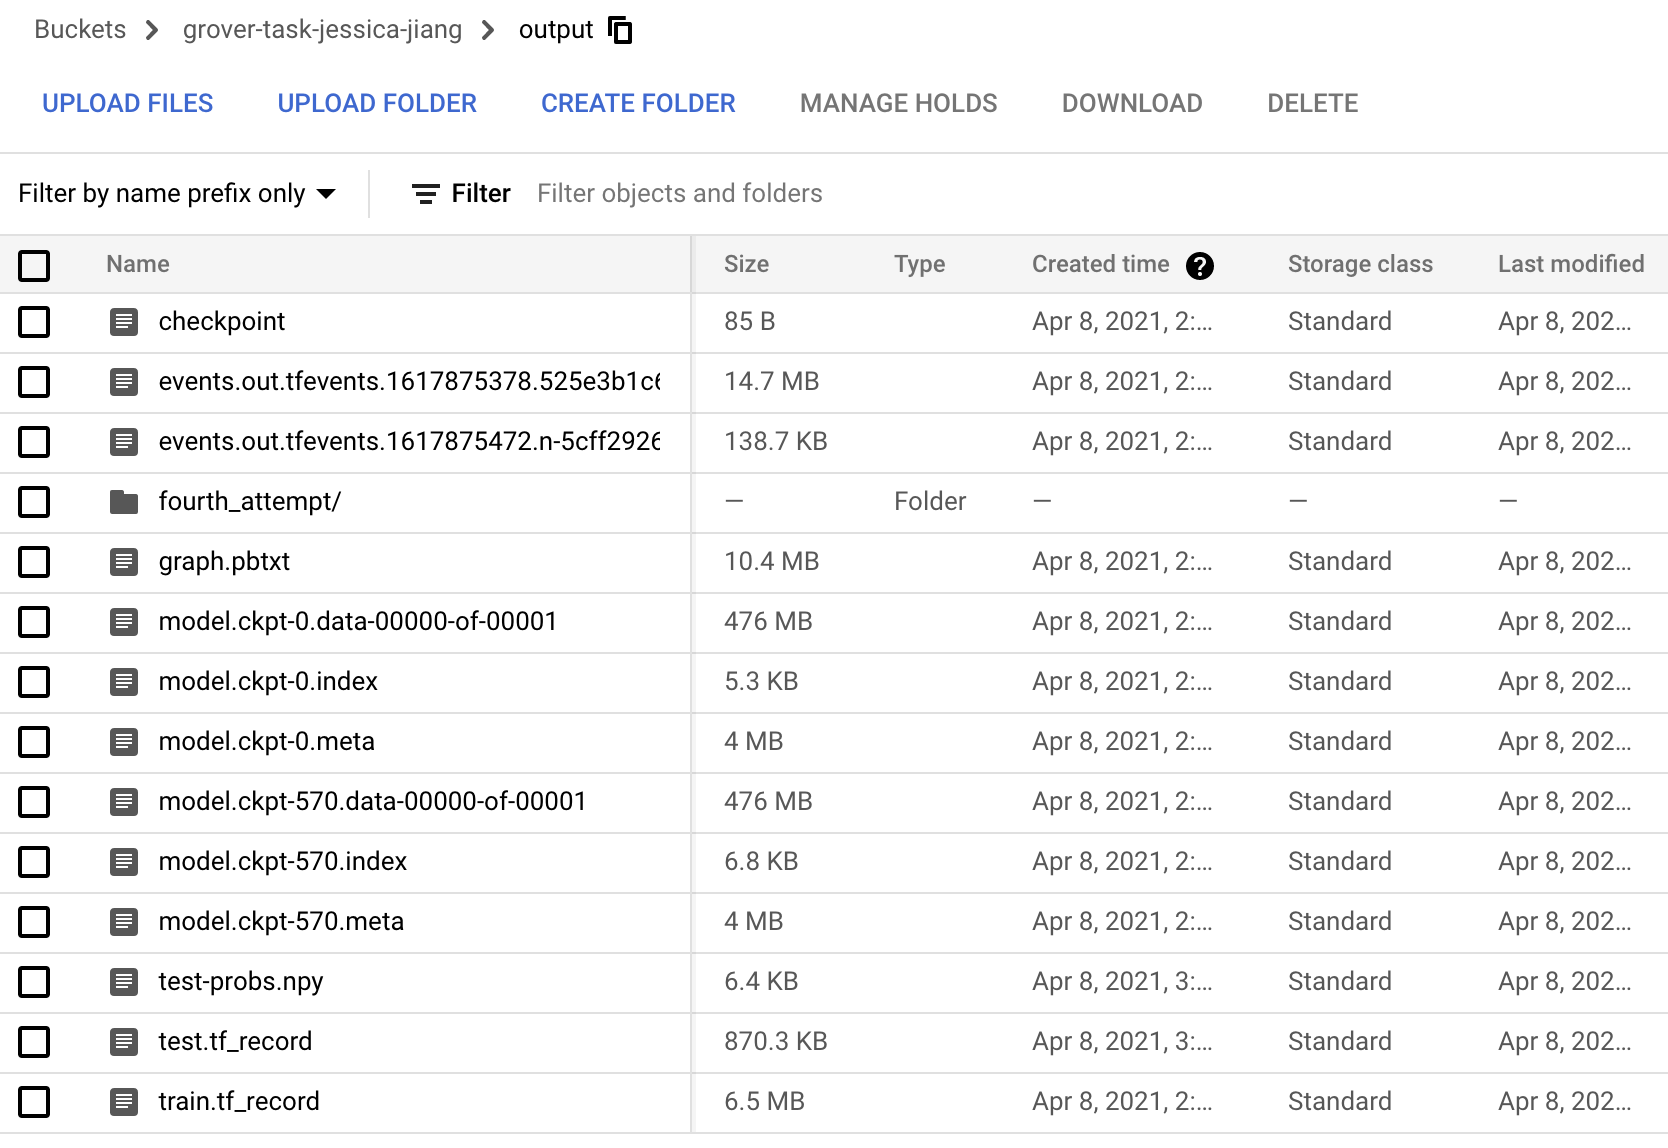